# Analysis of HR dataset
###### (https://www.kaggle.com/rhuebner/human-resources-data-set?select=HRDataset_v14.csv)

### 1. Is there any relationship between who a person works for and their performance score?
### 2.What is the overall diversity profile of the organization?
### 3.What are our best recruiting sources if we want to ensure a diverse organization?
### 4.Can we predict who is going to terminate and who isn't? What level of accuracy can we achieve on this?
### 5.Are there areas of the company where pay is not equitable?


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df=pd.read_csv('data/HRDataset_v14.csv',index_col='EmpID')
df.head()

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
10084,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
10196,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
10088,"Alagbe,Trina",1,1,0,1,5,3,0,64991,0,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
10069,"Anderson, Carol",0,2,0,5,5,3,0,50825,1,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [6]:
df.shape

(311, 35)

In [86]:
df['Position'].unique()

array(['Production Technician I', 'Sr. DBA', 'Production Technician II',
       'Software Engineer', 'IT Support', 'Data Analyst',
       'Database Administrator', 'Enterprise Architect', 'Sr. Accountant',
       'Production Manager', 'Accountant I', 'Area Sales Manager',
       'Software Engineering Manager', 'BI Director',
       'Director of Operations', 'Sr. Network Engineer', 'Sales Manager',
       'BI Developer', 'IT Manager - Support', 'Network Engineer',
       'IT Director', 'Director of Sales', 'Administrative Assistant',
       'President & CEO', 'Senior BI Developer',
       'Shared Services Manager', 'IT Manager - Infra',
       'Principal Data Architect', 'Data Architect', 'IT Manager - DB',
       'Data Analyst ', 'CIO'], dtype=object)

In [83]:
#Find out if there's a way to see df.head() with every single column showing.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 10026 to 10271
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   MarriedID                   311 non-null    int64  
 2   MaritalStatusID             311 non-null    int64  
 3   GenderID                    311 non-null    int64  
 4   EmpStatusID                 311 non-null    int64  
 5   DeptID                      311 non-null    int64  
 6   PerfScoreID                 311 non-null    int64  
 7   FromDiversityJobFairID      311 non-null    int64  
 8   Salary                      311 non-null    int64  
 9   Termd                       311 non-null    int64  
 10  PositionID                  311 non-null    int64  
 11  Position                    311 non-null    object 
 12  State                       311 non-null    object 
 13  Zip                         3

### There are 311 employees with 35 attributes. There's only one column with missing values: DateofTermination, because not everyone was terminated.

In [45]:
print('The mean absences of single employees is', df[df['MarriedID']==0]['Absences'].mean())
print('The mean absences of married employees is', df[df['MarriedID']==1]['Absences'].mean())

The mean absences of single employees is 9.780748663101605
The mean absences of married employees is 10.92741935483871


In [56]:
df[df['DateofTermination']!=np.nan]

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
10084,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
10196,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
10088,"Alagbe,Trina",1,1,0,1,5,3,0,64991,0,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
10069,"Anderson, Carol",0,2,0,5,5,3,0,50825,1,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,"Woodson, Jason",0,0,1,1,5,3,0,65893,0,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
10301,"Ybarra, Catherine",0,0,0,5,5,1,0,48513,1,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
10010,"Zamora, Jennifer",0,0,0,1,3,4,0,220450,0,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16


<AxesSubplot:xlabel='Salary', ylabel='PerfScoreID'>

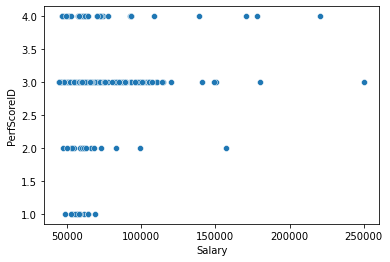

In [84]:
sns.scatterplot(x='Salary',y='PerfScoreID',data=df)

<AxesSubplot:xlabel='PerfScoreID', ylabel='count'>

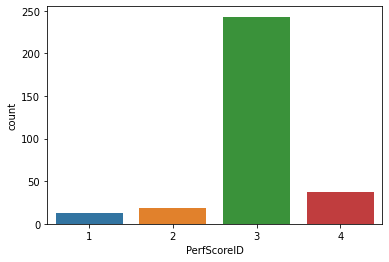

In [97]:
sns.countplot(x='PerfScoreID',data=df)

### Most people have a performance score of 3. We can quantify this below

<BarContainer object of 4 artists>

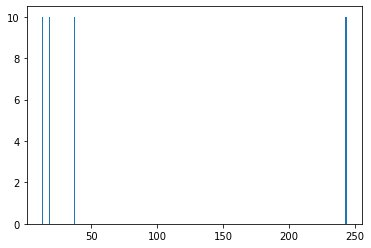

In [111]:
plt.bar(x=df.groupby(by='PerfScoreID')['Employee_Name'].count(),height=10)

### The only people with low performance rating are those with salary 70k or less.

In [88]:
df[df['PerfScoreID']==1]['Salary'].max()

68898

### More precisely, 69k.

In [69]:
df.groupby(['TermReason'])['Employee_Name'].count().sort_values()

TermReason
Fatal attraction                      1
Learned that he is a gangster         1
gross misconduct                      1
maternity leave - did not return      3
medical issues                        3
retiring                              4
military                              4
no-call, no-show                      4
performance                           4
return to school                      5
relocation out of area                5
attendance                            7
hours                                 8
career change                         9
more money                           11
unhappy                              14
Another position                     20
N/A-StillEmployed                   207
Name: Employee_Name, dtype: int64

### The average ratings of each manager.

In [35]:
df.groupby('ManagerName')['PerfScoreID'].mean().sort_values(ascending=False)

ManagerName
Eric Dougall          3.250000
Jennifer Zamora       3.142857
Simon Roup            3.117647
Alex Sweetwater       3.111111
Janet King            3.105263
Kelley Spirea         3.090909
Ketsia Liebig         3.047619
Brian Champaigne      3.000000
David Stanley         3.000000
Elijiah Gray          3.000000
Brandon R. LeBlanc    3.000000
Lynn Daneault         3.000000
Board of Directors    3.000000
Webster Butler        3.000000
Kissy Sullivan        2.954545
Amy Dunn              2.904762
Michael Albert        2.863636
Peter Monroe          2.857143
Brannon Miller        2.818182
John Smith            2.714286
Debra Houlihan        2.666667
Name: PerfScoreID, dtype: float64

In [ ]:
df.groupby('ManagerName')['PerfScoreID'].mean().sort_values

### Overall diversity profile: Let's use GenderID, Sex and RaceDesc. Let's also stratify by salary bins

In [27]:
df.groupby('GenderID')['Employee_Name'].count()

GenderID
0    176
1    135
Name: Employee_Name, dtype: int64

In [28]:
df.groupby('Sex')['Employee_Name'].count()

Sex
F     176
M     135
Name: Employee_Name, dtype: int64

### The counts for GenderID and Sex are identical. We have 176 female and 135 male employees.

In [33]:
df.groupby('RaceDesc')['Employee_Name'].count()

RaceDesc
American Indian or Alaska Native      3
Asian                                29
Black or African American            80
Hispanic                              1
Two or more races                    11
White                               187
Name: Employee_Name, dtype: int64

In [ ]:
df.groupby('hi')

<AxesSubplot:xlabel='Absences', ylabel='count'>

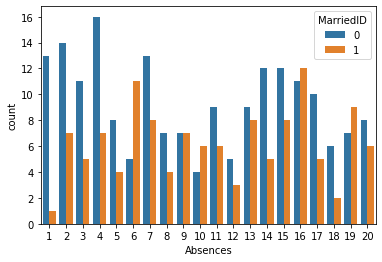

In [19]:
sns.countplot(x='Absences',hue='MarriedID',data=df)

In [37]:
df.groupby('Pe')

KeyError: 'Pe'

In [59]:
190 and above. Most people being terminated.
1. 
2. Group by manager and count how many are terminated.
3. Who are referring to more?

SyntaxError: invalid syntax (<ipython-input-59-dac18dfe3868>, line 1)

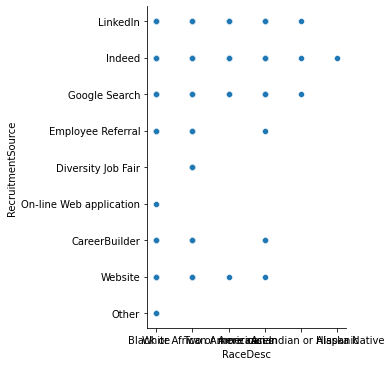

In [61]:
sns.relplot(x='RaceDesc', y='RecruitmentSource', data=df, size_norm=30)

In [58]:
df.groupby(['RaceDesc','RecruitmentSource'])['Employee_Name'].count()

RaceDesc                          RecruitmentSource      
American Indian or Alaska Native  Google Search               1
                                  Indeed                      1
                                  LinkedIn                    1
Asian                             CareerBuilder               2
                                  Employee Referral           1
                                  Google Search               7
                                  Indeed                     10
                                  LinkedIn                    8
                                  Website                     1
Black or African American         CareerBuilder               5
                                  Diversity Job Fair         29
                                  Employee Referral           5
                                  Google Search               4
                                  Indeed                     17
                                  LinkedIn    

In [54]:
pd.DataFrame.groupby?

In [73]:
data=df
data['combined'] = data['PerfScoreID'].astype(str)+' '+data['TermReason']
data.combined.value_counts()

3 N/A-StillEmployed                   161
4 N/A-StillEmployed                    29
3 Another position                     17
3 unhappy                              10
3 more money                            9
1 N/A-StillEmployed                     9
3 hours                                 8
2 N/A-StillEmployed                     8
3 career change                         6
3 relocation out of area                5
3 return to school                      5
3 attendance                            4
3 no-call, no-show                      3
2 attendance                            3
3 retiring                              3
3 medical issues                        3
3 military                              3
4 more money                            2
4 Another position                      2
3 performance                           2
2 unhappy                               2
3 maternity leave - did not return      2
2 career change                         2
3 Learned that he is a gangster   